# Plotting delay spectra
In this notebook, we show a few different ways of plotting delay spectra.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hera_pspec as hp
from pyuvdata import UVData

First, we need to load some data and generate power spectra, using `PSpecData`.

In [2]:
# Load beam model
beamfile = '../hera_pspec/data/HERA_NF_dipole_power.beamfits'
cosmo = hp.conversions.Cosmo_Conversions()
uvb = hp.pspecbeam.PSpecBeamUV(beamfile, cosmo=cosmo)

# Load data into UVData objects
dfile = '../hera_pspec/data/zen.all.xx.LST.1.06964.uvA'
uvd = UVData()
uvd.read_miriad(dfile)

# We only have 1 data file here, so slide the time axis by one integration 
# to avoid noise bias (not normally needed!)
uvd1 = uvd.select(times=np.unique(uvd.time_array)[:-1:2], inplace=False)
uvd2 = uvd.select(times=np.unique(uvd.time_array)[1::2], inplace=False)

# Create a new PSpecData object
ds = hp.PSpecData(dsets=[uvd1, uvd2], wgts=[None, None], beam=uvb)
ds.rephase_to_dset(0) # Phase to the zeroth dataset

# Construct list of baseline pairs to calculate power spectra for
bls = [(24,25), (37,38), (38,39),]
bls1, bls2, blp = hp.utils.construct_blpairs(bls, exclude_permutations=False, exclude_auto_bls=True)

# Power spectrum calculation
uvp = ds.pspec(bls1, bls2, (0, 1), [('xx', 'xx')], spw_ranges=[(300, 400), (600,721)], input_data_weight='identity', norm='I', 
               taper='blackman-harris', verbose=False)

In [3]:
blpairs = np.unique(uvp.blpair_array)

## Plot average power spectra
First, let's plot the LST- and baseline-pair-averaged power spectrum.

Baseline pairs: [124125137138, 124125138139, 137138124125, 137138138139, 138139124125, 138139137138]


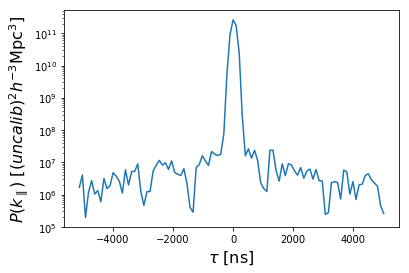

In [4]:
# Unpack the list of baseline-pairs into a Python list
blps = [blp for blp in blpairs]
print("Baseline pairs:", blps)

# Plot the spectra averaged over baseline-pairs and times
ax = hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol=('xx','xx'), average_blpairs=True, average_times=True)

The UVData files contain 3 time bins; let's average over baseline-pairs but keep the time bins intact. We can also use the shorthand `'xx'` to specify the matching polarization pair `('xx', 'xx')`.

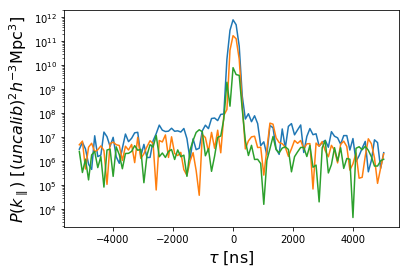

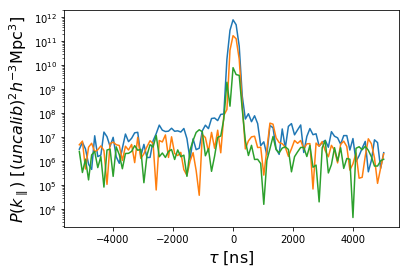

In [5]:
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=True, average_times=False)

And now let's try the opposite: average over times, but keep the baseline-pairs separate.

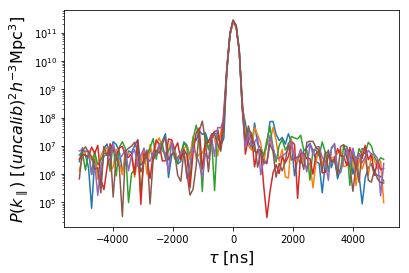

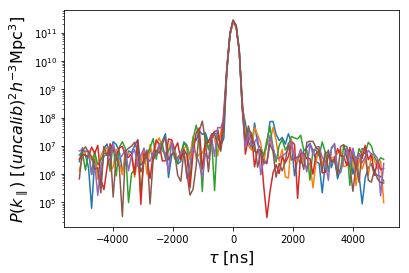

In [6]:
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=False, average_times=True)

## Cosmological units
Now let's plot in cosmological units instead of delay units (make sure a cosmology is set first):

self.cosmo exists and overwrite == False, not overwriting...


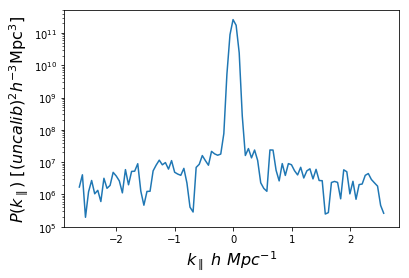

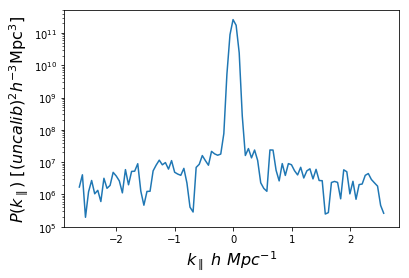

In [7]:
uvp.set_cosmology(hp.conversions.Cosmo_Conversions())
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=True, average_times=True, delay=False)

We can also plot the dimensionless $\Delta^2$ power spectrum instead of the regular power spectrum:

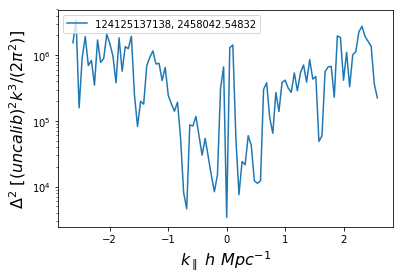

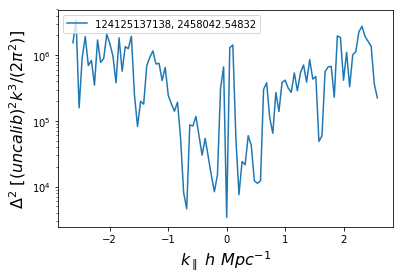

In [8]:
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=True, average_times=True, 
                       delay=False, deltasq=True, legend=True)